<a href="https://colab.research.google.com/github/kritikapal2003/electricity-consumption-prediction/blob/main/electricity_consumption_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(5),"\n")
print(df.tail(5),"\n")
print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

FileNotFoundError: [Errno 2] No such file or directory: 'AEP_hourly.csv'

In [ ]:
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [ ]:
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")


[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



Text(0.5, 1.0, 'Energy Consumption According to Year')

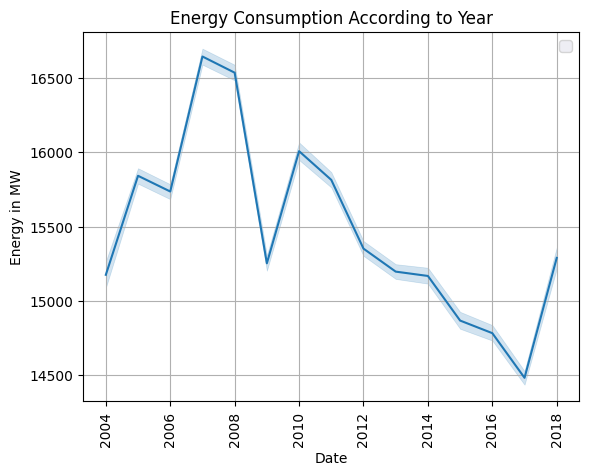

In [ ]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

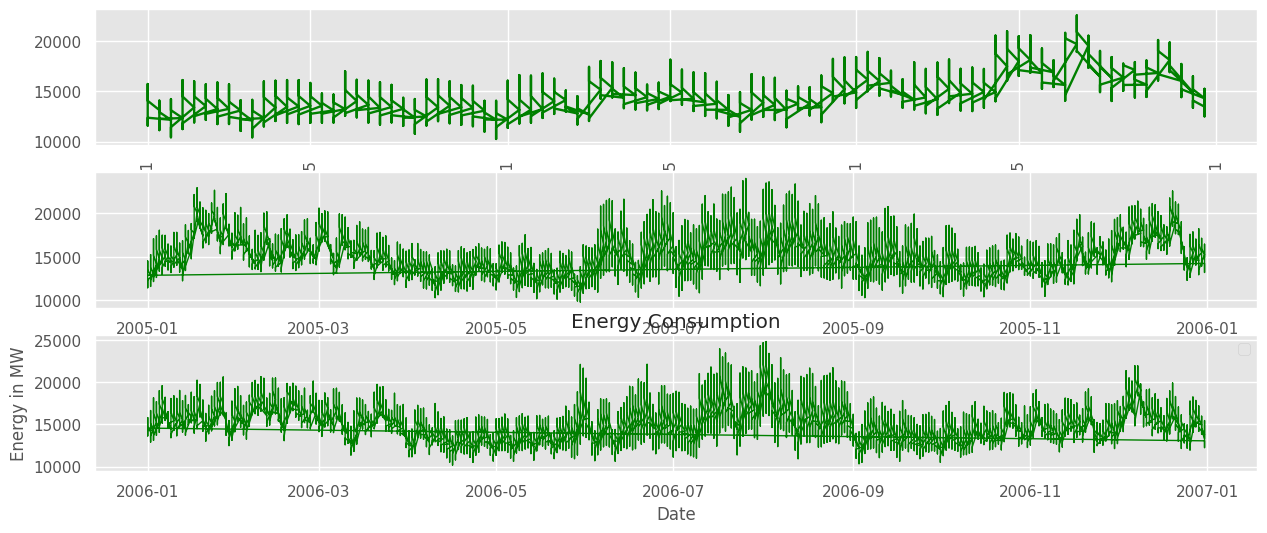

In [ ]:
from matplotlib import style
import matplotlib.pyplot as plt

# Ensure 'Year' column exists
dataset['Year'] = pd.to_datetime(dataset.index).year

fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

style.use('ggplot')

# Plot for 2004
y_2004 = dataset[dataset['Year'] == 2004]["AEP_MW"].to_list()
x_2004 = dataset[dataset['Year'] == 2004].index.date.tolist()
ax1.plot(x_2004, y_2004, color="green", linewidth=1.7)

# Plot for 2005
y_2005 = dataset[dataset['Year'] == 2005]["AEP_MW"].to_list()
x_2005 = dataset[dataset['Year'] == 2005].index.date.tolist()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)

# Plot for 2006
y_2006 = dataset[dataset['Year'] == 2006]["AEP_MW"].to_list()
x_2006 = dataset[dataset['Year'] == 2006].index.date.tolist()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)

plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.show()


<ipython-input-9-9e2b01b149bf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


Text(0.5, 1.0, 'Ennergy Distribution')

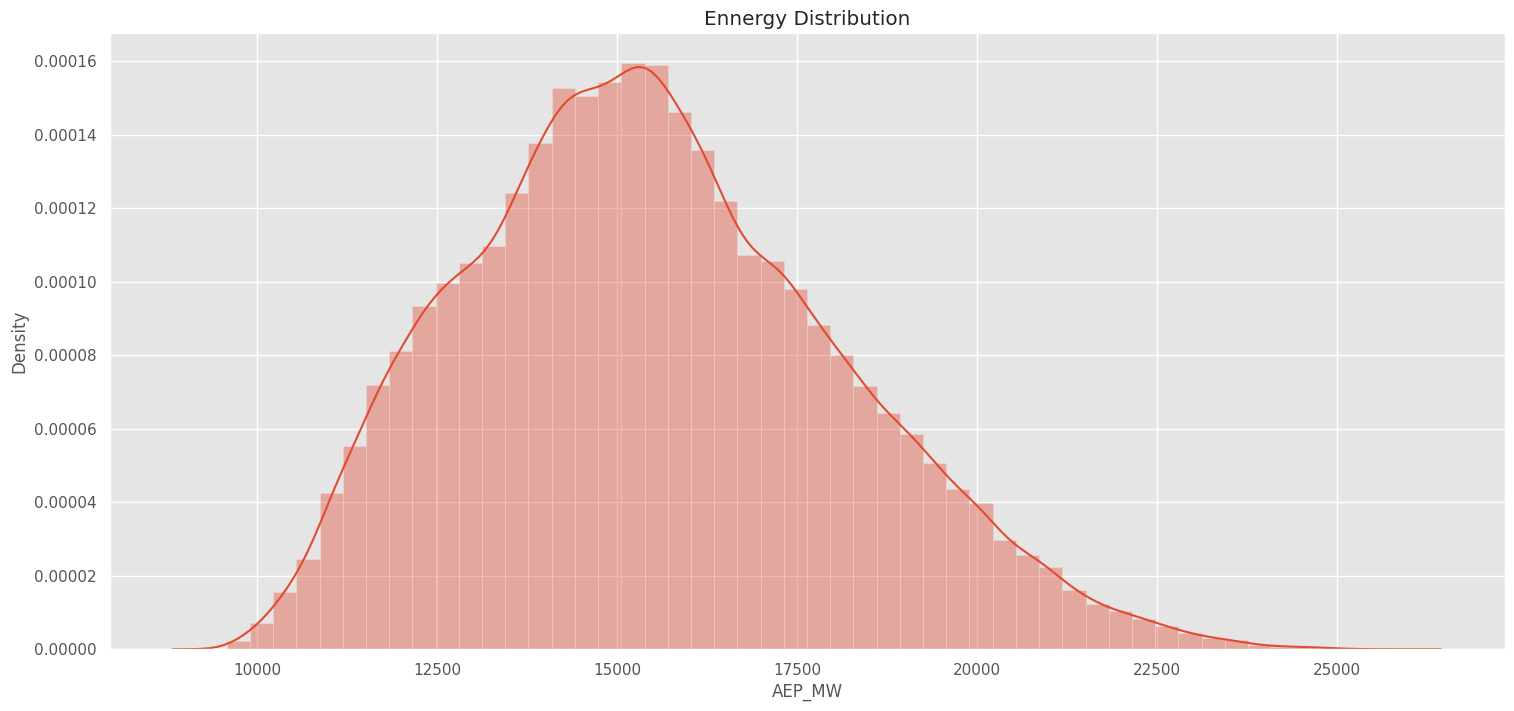

In [ ]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

In [ ]:
pd.plotting.register_matplotlib_converters()

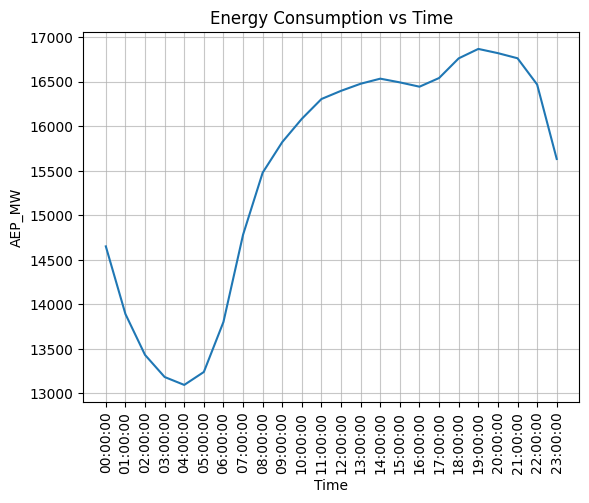

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('AEP_hourly.csv')

# Ensure 'Datetime' is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Convert 'Datetime' to the number of seconds since midnight
df["Seconds_since_midnight"] = df['Datetime'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

# Group by 'Seconds_since_midnight' and calculate the mean 'AEP_MW' for each time
grouped_data = df.groupby("Seconds_since_midnight").mean()

# Convert seconds to a time format string for plotting
grouped_data.index = pd.to_datetime(grouped_data.index, unit='s').time

# Ensure 'AEP_MW' is numeric
grouped_data["AEP_MW"] = pd.to_numeric(grouped_data["AEP_MW"], errors='coerce')

# Drop rows with NaN values
grouped_data = grouped_data.dropna()

# Plotting
fig, ax1 = plt.subplots()

# Convert time index to strings for x-axis labels
time_labels = [pd.to_datetime(str(t), format='%H:%M:%S').strftime('%H:%M:%S') for t in grouped_data.index]

sns.lineplot(x=time_labels, y=grouped_data["AEP_MW"], ax=ax1)

plt.title("Energy Consumption vs Time")
plt.xlabel("Time")
plt.ylabel("AEP_MW")
plt.grid(True, alpha=0.7)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

plt.show()





In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('AEP_hourly.csv')

# Convert 'Datetime' to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set 'Datetime' as the index
df.set_index('Datetime', inplace=True)

# Resample by day and calculate the mean
NewDataSet = df.resample('D').mean()

print(NewDataSet.head())


                  AEP_MW
Datetime                
2004-10-01  14284.521739
2004-10-02  12999.875000
2004-10-03  12227.083333
2004-10-04  14309.041667
2004-10-05  14439.708333


In [ ]:
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 2)
New  Dataset  (5055, 1)


In [ ]:
TestData = NewDataSet.tail(100)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[:-60]

In [ ]:
print("Training Set Shape ", Training_Set.shape)
print("Test Set Shape ", TestData.shape)

Training Set Shape  (4995, 1)
Test Set Shape  (100, 1)


In [ ]:
type(Training_Set.values)

numpy.ndarray

In [ ]:

Training_Set = Training_Set
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [ ]:
X_Train = []
Y_Train = []

# Range should be fromm 60 Values to END
for i in range(60, Train.shape[0]):

    # X_Train 0-59
    X_Train.append(Train[i-60:i])

    # Y Would be 60 th Value based on past 60 Values
    Y_Train.append(Train[i])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(4935, 60, 1)
(4935, 1)


In [ ]:
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
regressor.fit(X_Train, Y_Train, epochs = 50, batch_size = 32)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - loss: 0.0364
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - loss: 0.0184
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - loss: 0.0172
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - loss: 0.0163
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - loss: 0.0159
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - loss: 0.0168
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 19s 120ms/step - loss: 0.0153
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - loss: 0.0161
Epoch 9/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - loss: 0.0146
Epoch 10/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 21s 114ms/step - loss: 0.0118
Epoch 11/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - loss: 0.0100
Epoch 12/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 24s 129ms/step - loss: 0.0094
Epoch 13/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - loss: 0.0083
Epoch 14/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - loss: 0.0078
Epoch 15/50
155

In [ ]:
TestData.head(2)


,AEP_MW
Datetime,
2018-04-26,13157.791667
2018-04-27,12964.000000


In [ ]:
TestData.shape

(100, 1)

In [ ]:

NewDataSet.shape

(5055, 1)

In [ ]:
Df_Total = pd.concat((NewDataSet[["AEP_MW"]], TestData[["AEP_MW"]]), axis=0)

In [ ]:

Df_Total.shape

(5155, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values
inputs.shape

(160, 1)

In [ ]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 60:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 160):
    X_test.append(inputs[i-60:i])

# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model
predicted_stock_price = regressor.predict(X_test)

# Do inverse Transformation to get Values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step


In [ ]:

True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()

In [ ]:
Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt":[x[0] for x in Predicted_MegaWatt ] })

In [ ]:

Machine_Df

,Date,TrueMegaWatt,PredictedMeagWatt
0,2018-04-26,13157.791667,13458.561523
1,2018-04-27,12964.000000,13185.165039
2,2018-04-28,12237.583333,14701.010742
3,2018-04-29,12156.791667,13281.300781
4,2018-04-30,13443.500000,13024.665039
...,...,...,...
95,2018-07-30,15368.083333,15398.956055
96,2018-07-31,15180.291667,15690.068359
97,2018-08-01,15151.166667,15009.919922
98,2018-08-02,15687.666667,15212.349609


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

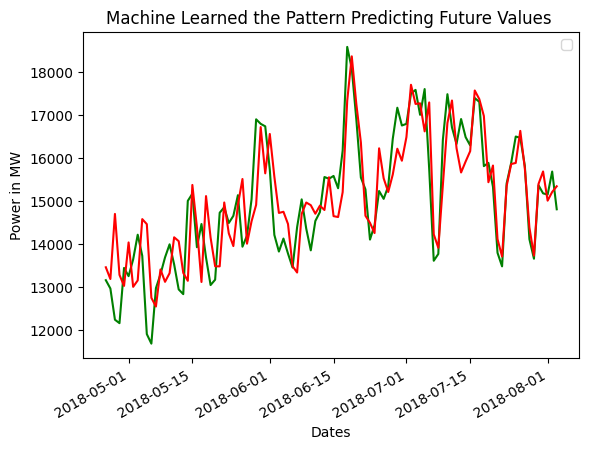

In [ ]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()